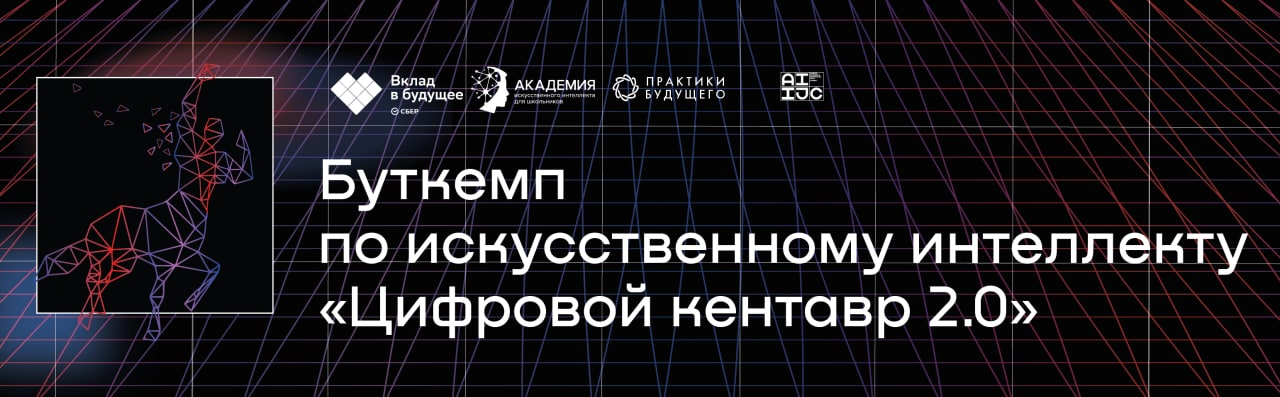

# Общие принципы, работа с текстовыми файлами

Зачастую, если наша программа взаимодействует с окружающим миром, это делается с помощью файлов. Передача текстов, загрузка картинок, расчеты с табличными данными - файлам можно придумать множество применений :)

Давайте оставим этому миру послание - создадим текстовый файл и напишем в нем "Hello, world!"

Чтобы открыть файл, находящийся по пути path, нужно воспользоваться функцией open(path, mode). mode обозначает то, что мы хотим делать с файлом - если что-то написать в него, то нужно положить mode="w", если прочитать из файла, то mode="r". По умолчанию файл открывается на чтение. Если файла по пути path ранее не существовало, то при открытии с mode="r" получится ошибка (логично - нельзя прочитать то, чего нет). Если же mode="w", то файл по такому пути сам создастся, и мы сможем в него что-то записать. 

In [1]:
#открываем файл hello.txt
f = open("hello.txt", "w")

Для того, чтобы написать что-то в открытый файл, нужно написать f.write(что-то). Можно вызвать f.write(что-то) несколько раз, тогда текст будет дописываться друг за другом

In [ ]:
#напишем в открывшийся файл Hello, world!
f.write("Hello, ")
f.write("world!")

6

После того, как мы закончили работу с файлом, его необходимо закрыть с помощью функции close()

In [ ]:
f.close()

Чтобы не писать каждый раз f.close() и точно не забыть о закрытии файла, можно воспользоваться следующей конструкцией

In [ ]:
with open("hello.txt", "w") as f:
  f.write("Hello, ")
  f.write("world!")

Данный фрагмент кода равносилен тому, что мы сделали ранее. Тут откроется файл hello.txt на запись, попадет в переменную f, в которую мы сможем записать информацию, и после того, как код под with будет выполнен, файл автоматически будет закрыт.

Важно отметить, что в файл мы можем записывать только какой-то текст, соответственно следующий код вызовет ошибку:

In [ ]:
with open("cipher.txt", "w") as f:
  f.write(1)

TypeError: ignored

Теперь давайте прочитаем, что мы написали в наш файл. Для этого используется функция read() - она отдает все содержимое файла в виде строки. Далее я буду пользоваться with, так как это удобнее. 

In [ ]:
with open("hello.txt", "r") as f:
  print(f.read())

Hello, world!


Как мы можем заметить, в файле находится всего одна фраза Hello, world!, хотя мы написали две. Это происходит из-за того, что когда мы открываем файл на запись и что-то в него пишем, то информация, которая лежала там, пропадает. Чтобы этого избежать и иметь возможность дописывать в конец файла, необходимо вместо mode="w" использовать mode="a"

In [ ]:
with open("hello.txt", "a") as f:
  f.write("Hello, world!")

#посмотрим, что мы написали в файл теперь

with open("hello.txt", "r") as f:
  print(f.read())

Hello, world!Hello, world!


Помимо метода f.read(), который позволяет считывать всю информацию из файла сразу, используется метод f.readlines(), который разбивает файл на строки и кладет их в список. Давайте создадим несколько файлов, и затем объединим их в один

In [ ]:
for i in range(4):
  with open(f"a_{i}.txt", "w") as f:
    '''
    запишем в каждый файл последовательность чисел от i до i + 4, т.е. при i=2
    файл выглядит так:
    2
    3
    4
    5
    '''
    f.write("\n".join([str(j + i) for j in range(4)]))

"""
теперь присоединим эти файлы построчно, т.е. в i строке будет стоять конкатенация i-ых строк всех файлов
например, в первой строке итогового файла получится
0 1 2 3
Для этого удобно будет считывать строки из файла с помощью readlines
"""

result = ["" for i in range(4)]
for i in range(4):
  with ...что тут нужно написать? Допишите самостоятельно :)... as f:
    lines = f.readlines()
  for j in range(4):
    #метод readlines оставляет символы перехода строки, поэтому нам нужно от них избавиться с помощью strip
    result[j] += lines[j].strip("\n")
    result[j] += " "

with open("a.txt", "w") as f:
  #нужно использовать join, так как в файл мы можем записывать только текст
  # и нам нужен переход на новую строку
  f.write("\n".join(result))

#проверим, что все получилось
with open("a.txt", "r") as f:
  print(f.read())

0 1 2 3 
1 2 3 4 
2 3 4 5 
3 4 5 6 


Должно получиться нечто такое
```
0 1 2 3
1 2 3 4
2 3 4 5
3 4 5 6
```

С помощью open можно открывать не только текстовые файлы, но и файлы любого типа, что мы увидим далее. Также, некоторые файлы необходимо открывать, добавив к режиму открытия "b". Это означает, что мы вытаскиваем из файла не строку, а байты (например, прочитать файл побайтово - open(filename, "rb"))

# Работа с csv-файлами

Очень популярным форматом хранения данных в сфере машинного обучения является csv - comma-separated values. В нем каждая строка файл символизирует строку в табличке, а значения внутри строки разделяются с помощью запятых

Например, рассмотрим вот такую таблицу:

| Рост | Пол | Вес |
|------|-----|-----|
| 185  | М   | 83  |
| 163  | Ж   | 49  |
| 170  | Ж   | 57  |
| 179  | М   | 60  |

Первой строкой в файл записываются названия колонок, а потом идут непосредственно данные. Тогда, если бы мы записали её в файл формата .csv, то он бы выглядел вот так:


Рост,Пол,Вес<br>
185,М,83<br>
163,Ж,49<br>
170,Ж,57<br>
179,М,60<br>

Давайте это и сделаем! С помощью open создадим таблицу table.csv, и запишем туда наши данные

In [ ]:
#данные
data = [[185, "М", 83],
        [163, "Ж", 49],
        [170, "Ж", 57],
        [179, "М", 60]]

columns = ["Рост", "Пол", "Вес"]

#создадим table.csv, открыв его с помощью open на запись
with open("table.csv", "w") as f:
  #сначала запишем названия колонок в файл
  f.write(",".join(columns))
  #обязательно добавляем в файл переход на новую строку, так как write этого сам не сделает
  #без этого сломается разбиение данных на строки
  f.write("\n")
  #добавим в файл все строки нашей таблички построчно
  for line in data:
    #сначала нужно превратить строку таблички (т.е. список) в строковую переменную
    #иначе write выдаст ошибку, так как в файл можно записывать только строковую информацию
    line = [str(x) for x in line]
    f.write(",".join(line))
    f.write("\n")

Проверим, что мы все сделали правильно

In [ ]:
with open("table.csv", "r") as f:
  print(f.read())

Рост,Пол,Вес
185,М,83
163,Ж,49
170,Ж,57
179,М,60



Теперь давайте вытащим записанные в файл данные обратно, в список

Для считывания информации из csv таблицы удобно будет использовать метод f.readlines(), который разбивает файл на строки и кладет их в список. Воспользуемся им:

In [ ]:
with open("table.csv", "r") as f:
  lines = f.readlines()
  data = []
  #нам нужно использовать strip, так как readlines не убирает символы перехода строки
  columns = lines[0].strip("\n").split(",")
  for line in lines[1:]:
    data.append(line.strip("\n").split(","))
print(*columns)
for x in data:
  print(",".join(x))

Рост Пол Вес
185,М,83
163,Ж,49
170,Ж,57
179,М,60


Осталось превратить данные в столбцах Рост и Вес в числа, и мы получим требуемое.

In [ ]:
for i in range(len(data)):
  data[i][0], data[i][2] = int(data[i][0]), int(data[i][2])
print(data[0])

[185, 'М', 83]


Задача для закрепления: создайте две csv таблицы. В одном случае для разделителя строк в таблице используйте точку с запятой, в другом случае - переход на новую строку. Считайте их из файлов, и затем сравните поэлементно, получив таблицу со значениями True или False, где True в i-ой строке j-ом столбце означает, что элементы на этом месте в обоих изначальных табличках совпадают

Создание таблиц:

In [ ]:
columns = ["Рост", "Пол", "Вес"]

first_table = [[185, "М", 83],
               [163, "Ж", 49],
               [170, "Ж", 57],
               [179, "М", 60]]

second_table = [[185, "М", 78],
                [165, "Ж", 52],
                [170, "Ж", 57],
                [179, "Ж", 54]]

with open("table_1.csv", "w") as f:
  f.write(",".join(columns))
  # ваш код здесь

with open("table_2.csv", "w") as f:
  f.write(",".join(columns))
  f.write("\n")
  lines = "\n".join([",".join([str(x) for x in line]) for line in second_table])
  f.write(lines)

Считывание и сравнение

In [ ]:
tables_params = [("table_1.csv", ";"), ("table_2.csv", "\n")]
#в список tables положите на нулевую позицию данные первой таблицы, на вторую позицию - данные второй таблицы
#без названий колонок!
tables = []
for filename, delimeter in tables_params:
  with open(filename, "r") as f:
    raw_data = f.read()
    # ваш код здесь
    table_data = [x.split(",") for x in raw_data.split(delimeter)[1:]]
  tables.append(table_data)

for i in range(4):
  for j in range(3):
    print(tables[0][i][j] == tables[1][i][j], end=" ")
  print()

True True False 
False True False 
True True True 
True False False 


Должна получиться следующая табличка:
```
True True False 
False True False 
True True True 
True False False 
```

# Работа с json-файлами

Не всегда данные удобно представлять в табличном формате. Например, если у нас есть информация о городах и ресторанах в них, то нам может быть удобно представить её в виде вложенных словарей такого вида:


```json
{
  "Москва": {
    "White Rabbit": {
      "Средний чек, р.": 1500, 
      "Звезды мишлен": 1
    },
    "Дичь": {
      "Средний чек, р.": 700
    }
  },
  "Санкт-Петербург": {
    "Хотдожная 8956": {
      "Средний чек, р.": 800,
      "Создатель": "Друже Обломов"
    },
    "Баклажан": {
      "Средний чек, р.": 1300
    }
  }
}
```

Для хранения данных в таком виде используется формат json. Он, например, очень часто используется для передачи информации между сайтами. Для работы с ним используется библиотека json, которая автоматически устанавливается вместе с python.

In [ ]:
import json

In [ ]:
data = {
  "Москва": {
    "White Rabbit": {
      "Средний чек, р.": 1500, 
      "Звезды мишлен": 1
    },
    "Дичь": {
      "Средний чек, р.": 700
    }
  },
  "Санкт-Петербург": {
    "Хотдожная 8956": {
      "Средний чек, р.": 800,
      "Создатель": "Друже Обломов"
    },
    "Баклажан": {
      "Средний чек, р.": 1300
    }
  }
}

Для записи такого вложенного словаря в файл используется функция dump(data, file) из библиотеки json

In [ ]:
with open("data.json", "w") as f:
  json.dump(data, f)

Чтобы открыть записанный нами словарь, используется функция json.load(f)

In [ ]:
with open("data.json", "r") as f:
  restaraunts_dict = json.load(f)
  print(restaraunts_dict["Москва"]["White Rabbit"])

{'Средний чек, р.': 1500, 'Звезды мишлен': 1}


Такой формат хранения данных удобен, если они имеют иерархическую архитектуру